In [ ]:
# Mayank Singla
# 111901030

In [1]:
import numpy as np                  # Importing numpy as np
import matplotlib.pyplot as plt     # Importing matplotlib.pyplot as plt
import csv                          # Importing csv module

In [2]:
# Q1 Data Importing

linearData = [] # Given linearData

with open("linear.txt") as linearFile:  # Reading data from linear.txt file
    linearFile.readline()               # Reading first line

    for line in linearFile:  # Reading all the lines one by one
        point = []           # Given point in the line

        for word in line.split():       # Reading point in the line
            point.append(float(word))

        linearData.append(point)    # Adding point to Data list

Optimal w* obtained: [1.8531700287234585, 1.5525919047619046]
0.0929632178406552


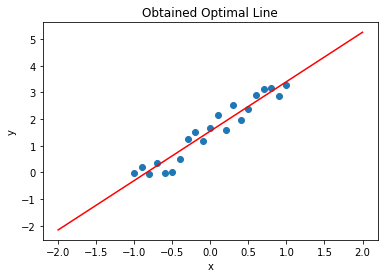

In [4]:
# Q1

T = 100  # Number of iterations peformed
n = len(linearData) # Number of points given
alpha = 0.01        # alpha value taken (found using trial and error method)
wt = [0, 0]         # initial wt taken

sse = 0

for i in range(T):  # Executing for T iterations
    sum0, sum1 = 0, 0    # First and second sum to find

    for j in range(n):  # Looping for all the points to find sum
        sum0 += (((wt[0] * linearData[j][0]) + wt[1] - linearData[j][1]) * linearData[j][0])    # Finding first sum
        sum1 += ((wt[0] * linearData[j][0]) + wt[1] - linearData[j][1])                         # Finding second sum

    wt[0] = wt[0] - (2 * alpha * sum0)  # Updating wt[0]
    wt[1] = wt[1] - (2 * alpha * sum1)  # Updating wt[1]

for (x, y) in linearData:
    f = wt[0]*x + wt[1]
    sse += (y - f)**2

print("Optimal w* obtained:", wt)
print(sse / n)

x = np.linspace(-2, 2, 100) # Generating x-coordinates to plot line
y = wt[0] * x + wt[1]         # Gnerating corresponding y-coordinates
plt.plot(x, y, 'r') # Plotting line obtained
plt.scatter(np.array(linearData)[:, 0], np.array(linearData)[:, 1]) # Plotting given points
plt.xlabel("x") # x-label for the plot
plt.ylabel("y") # y-lavel for the plot
plt.title("Obtained Optimal Line")  # Title of the plot
plt.draw()  # Drawing the curve
plt.show()  # Displaying the curve

In [ ]:
# Q2 Data Importing

logisticData = [] # Given logisticData

with open("logistic.txt") as logisticFile:  # Reading data from logistic.txt file
    logisticFile.readline()               # Reading first line

    for line in logisticFile:   # Reading all the lines one by one
        point = []              # Given point in the line
        for word in line.split():      # Reading point in the line
            point.append(float(word))

        logisticData.append(point)    # Adding point to Data list

Optimal w* obtained: [11.304507217414443, 11.417308355989983, -8.338045127870526]


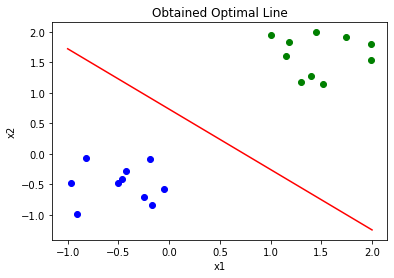

In [ ]:
# Q2

def sigmoid2(w, x, y):   # Funtion to get the value of sigma function i.e. sigma(y * wT * x)
    return 1/(1 + np.exp(-y * (w[0]*x[0] + w[1]*x[1] + w[2])))

T = 90000  # Number of iterations peformed
n = len(logisticData) # Number of points given
alpha = 1        # alpha value taken (found using trial and error method)
wt = [0, 0, 0]         # initial wt taken

for i in range(T):  # Executing for T iterations
    sum0, sum1, sum2 = 0, 0, 0  # All the different sum to find

    for j in range(n):  # Looping for all the points to find sum
        x = logisticData[j][:-1]    # x-value
        y = logisticData[j][len(logisticData[j]) - 1]   # y-value
        sum0 += ((1 - sigmoid2(wt, x, y)) * y * x[0])    # Finding first sum
        sum1 += ((1 - sigmoid2(wt, x, y)) * y * x[1])    # Finding second sum
        sum2 += ((1 - sigmoid2(wt, x, y)) * y)           # Finding third sum

    wt[0] = wt[0] + alpha * sum0    # Updating wt[0]
    wt[1] = wt[1] + alpha * sum1    # Updating wt[1]
    wt[2] = wt[2] + alpha * sum2    # Updating wt[2]
        
print("Optimal w* obtained:", wt)

x1Class1 = []   # List of x1-coordinates of points with Class +1
x2Class1 = []   # List of x2-coordinates of points with Class +1
x1Class2 = []   # List of x1-coordinates of points with Class -1
x2Class2 = []   # List of x2-coordinates of points with Class -1

for point in logisticData:  # Looping all the points in the given data
    y = point[2]    # y-value

    if (y == 1):    # if point belongs to Class +1
        x1Class1.append(point[0])   # Adding x1-coordinate to corresponding list
        x2Class1.append(point[1])   # Adding x2-coordinate to corresponding list

    else:    # else point belongs to Class -1
        x1Class2.append(point[0])   # Adding x1-coordinate to corresponding list
        x2Class2.append(point[1])   # Adding x2-coordinate to corresponding list

plt.scatter(x1Class1, x2Class1, c = 'g')    # Plotting points of Class +1 with Green
plt.scatter(x1Class2, x2Class2, c = 'b')    # Plotting points of Class -1 with Blue
x1 = np.linspace(-1, 2, 100)        # Generating x1-coordinates to plot line
x2 = (-wt[0] * x1 - wt[2]) / wt[1]    # Generating corresponding x2 coordinates
plt.plot(x1, x2, 'r')   # Plotting line obtained
plt.xlabel("x1") # x-label for the plot
plt.ylabel("x2") # y-lavel for the plot
plt.title("Obtained Optimal Line")  # Title of the plot
plt.draw()  # Drawing the curve
plt.show()  # Displaying the curve

In [ ]:
# Q3 Data Importing

mnistTrainData = [] # Given MNIST-Train Data

with open("mnist_train.csv") as mnistTrainFile: # Reading MNIST Train file given
    reader = csv.reader(mnistTrainFile)     # csvreader for the file
    fields = next(reader)   # Reading the fields as they are the first row
    for row in reader:      # Reading all the rows
        if (int(row[0]) == 4):  # If row label is 4
            point = [int(p) for p in row][1:]   # Getting the xi values of the point
            point.append(1)                     # Padding the point by 1
            point.append(int(row[0]))           # Label for the point
            mnistTrainData.append(np.array(point))  # Adding it to Data list

        elif (int(row[0]) == 7):    # or if row label is 7
            point = [int(p) for p in row][1:]   # Getting the xi values of the point
            point.append(1)                     # Padding the point by 1
            point.append(int(row[0]))           # Label for the point
            mnistTrainData.append(np.array(point))  # Adding it to Data list


mnistTestData = [] # Given MNIST-Test Data

with open("mnist_test.csv") as mnistTestFile: # Reading MNIST Train file given
    reader = csv.reader(mnistTestFile)     # csvreader for the file
    fields = next(reader)   # Reading the fields as they are the first row
    for row in reader:      # Reading all the rows
        if (int(row[0]) == 4):  # If row label is 4
            point = [int(p) for p in row][1:]   # Getting the xi values of the point
            point.append(1)                     # Padding the point by 1
            point.append(int(row[0]))           # Label for the point
            mnistTestData.append(np.array(point))  # Adding it to Data list

        elif (int(row[0]) == 7):    # or if row label is 7
            point = [int(p) for p in row][1:]   # Getting the xi values of the point
            point.append(1)                     # Padding the point by 1
            point.append(int(row[0]))           # Label for the point
            mnistTestData.append(np.array(point))  # Adding it to Data list

In [ ]:
# Function to get sigma(y*(wT.x))
def sigmoid3(w, x, y):
    return 1 / (1 + np.exp(-y * np.sum(w * x)))

In [ ]:
# Q3

T = 10000       # Number of iterations performed
dim = len(mnistTrainData[0]) - 1    # Dimension of points after padding
alpha = 0.01        # Alpha value taken
wt = np.zeros(dim)  # Initial wt array

# Execution Time: 39mins 43secs
for i in range(T):  # Looping for T iterations
    # print(i, end = " ") # For testing, to track how many iterations have completed

    sum = np.zeros(dim) # Initial Sum array

    for point in mnistTrainData:  # Looping all the points
        x = point[:-1]    # x-value
        y = 1 if (point[dim] == 4) else -1   # y-value
        sum += ((1 - sigmoid3(wt, x, y)) * y * x)   # Adding value to sum

    wt = wt + (alpha * sum) # Updating wt

In [ ]:
# Function to get the sign of sigma(wT.x)
def getSigmoidSign(wt, x):
    return 1 if (np.sum(wt * x) > 0) else -1

correct = 0 # Number of test passed

for point in mnistTestData: # Looping all the points in MNIST Test Data
    x = point[:-1]  # x-value
    y = point[dim]  # y-value
    sign = getSigmoidSign(wt, x)    # Getting sign of sigma(wT.x)
    if(sign > 0 and y == 4):    # if sign > 0, it belongs to class +1 i.e. 4
        correct += 1
    elif(sign < 0 and y == 7):  # if sign > 0, it belongs to class +1 i.e. 7
        correct += 1

print("Accuracy :", correct * 100 / len(mnistTestData), "%") # Printing accuracy of w* obtained

Accuracy : 98.1094527363184 %
